In [8]:
'''
originally injected x injections per brick. a% real elgs, b% containmation
the real elgs would be a%*x. 
my containmation: still x injections per brick, containmation in my sample is c%. 
randomly select x containmation, add output to real elgs with a weight of c%/(1-c%)
'''

'\noriginally injected x injections per brick. a% real elgs, b% containmation\nthe real elgs would be a%*x. \nmy containmation: still x injections per brick, containmation in my sample is c%. \nrandomly select x containmation, add output to real elgs with a weight of c%/(1-c%)\n'

In [9]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn_elg_like = topdir+'dr3_elg_like.fits'
fn_elg = topdir+'eBOSS_ELG_full_ALL_v4.dat.fits'
fn_sim = topdir+'sgc_run_sim.fits'

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flag']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-2, 2)

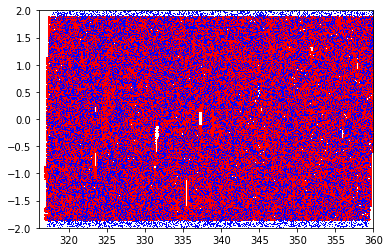

In [10]:
#only 8% of them are elgs, this is too small??
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
dat_l = fits.getdata(fn_elg_like)
dat_e = fits.getdata(fn_elg)
sim = fits.getdata(fn_sim)
plt.plot(dat_l['ra'],dat_l['dec'],'r,')
plt.plot(dat_e['ra'],dat_e['dec'],'b,')
plt.gca().set_xlim(316,360)
plt.gca().set_ylim(-2,2)

In [11]:
len(dat_l),len(dat_e[dat_e['dec']<10])

(1788524, 147676)

(-5, 5)

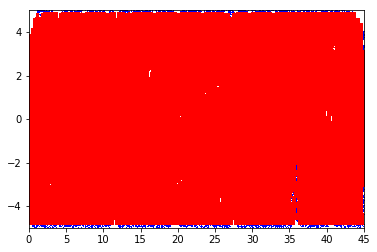

In [12]:
plt.plot(dat_e['ra'],dat_e['dec'],'b,')
plt.plot(dat_l['ra'],dat_l['dec'],'r,')

plt.gca().set_xlim(0,45)
plt.gca().set_ylim(-5,5)

In [13]:
gs = 22.5 - 2.5 * np.log10(sim['gflux']/sim['mw_transmission_g'])
rs = 22.5 - 2.5 * np.log10(sim['rflux']/sim['mw_transmission_r'])
zs = 22.5 - 2.5 * np.log10(sim['zflux']/sim['mw_transmission_z'])
grs = gs-rs
rzs = rs-zs

In [14]:
gls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[1]/DDDAT['decam_mw_transmission'].transpose()[1])
rls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[2]/DDDAT['decam_mw_transmission'].transpose()[2])
zls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[4]/DDDAT['decam_mw_transmission'].transpose()[4])
grls = gls-rls
rzls = rls-zls

In [15]:
gle = 22.5 - 2.5 * np.log10(datle['decam_flux'].transpose()[1]/datle['decam_mw_transmission'].transpose()[1])
rle = 22.5 - 2.5 * np.log10(datle['decam_flux'].transpose()[2]/datle['decam_mw_transmission'].transpose()[2])
zle = 22.5 - 2.5 * np.log10(datle['decam_flux'].transpose()[4]/datle['decam_mw_transmission'].transpose()[4])
grle = gle-rle
rzle = rle-zle

NameError: name 'datle' is not defined

Text(0.5,1,'g_mag')

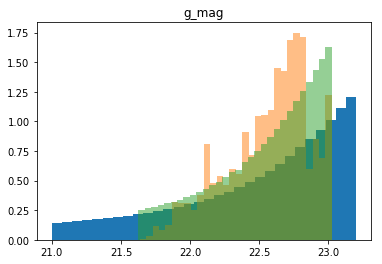

In [18]:
g = 22.5 - 2.5 * np.log10(dat_l['decam_flux'].transpose()[1]/dat_l['decam_mw_transmission'].transpose()[1])
p = plt.hist(g,bins = 30,normed = True)
#p = plt.hist(dat_e['g'],bins = 20,normed = True, alpha = 0.5)
#p = plt.hist(g[(g>21.825)&(g<22.825)],bins = 20,normed = True, alpha = 0.3)
p = plt.hist(gs,bins = 30,normed = True, alpha = 0.5)
p = plt.hist(gls,bins = 30,normed = True, alpha = 0.5)
#dat_e_new = dat_e[dat_e['dec']<10]
#p = plt.hist(dat_e_new['g'],bins = 30,normed = True, alpha = 0.5)
#p = plt.hist(gle,bins = 30,normed = True, alpha = 0.5)
plt.title('g_mag')

In [123]:
g = 22.5 - 2.5 * np.log10(dat_l['decam_flux'].transpose()[1]/dat_l['decam_mw_transmission'].transpose()[1])
r = 22.5 - 2.5 * np.log10(dat_l['decam_flux'].transpose()[2]/dat_l['decam_mw_transmission'].transpose()[2])
z = 22.5 - 2.5 * np.log10(dat_l['decam_flux'].transpose()[4]/dat_l['decam_mw_transmission'].transpose()[4])
gr = g-r
rz = r-z

In [7]:
p = plt.hist(-0.068*rz+0.457-gr,bins=20,normed = True)
p = plt.hist(-0.068*rzs+0.457-grs,bins=20,alpha=0.5,normed = True)
p = plt.hist(-0.068*rzls+0.457-grls,bins=20,alpha=0.5,normed = True)
p = plt.hist(-0.068*dat_e_new['rz']+0.457-dat_e_new['gr'],bins=20,alpha=0.5,normed = True)
p = plt.hist(-0.068*rzle+0.457-grle,bins=20,alpha=0.5,normed = True)

NameError: name 'rz' is not defined

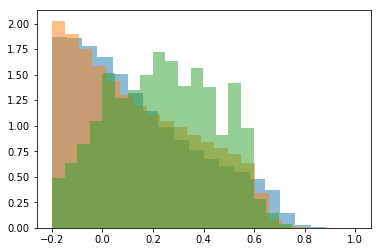

In [137]:
p = plt.hist(0.112*rz+0.773-gr,bins=20,normed = True,alpha=0.5)
p = plt.hist(0.112*rzls+0.773-grls,bins=20,normed = True,alpha=0.5)
p = plt.hist(0.112*rzs+0.773-grs,bins=20,normed = True,alpha=0.5)
#p = plt.hist(0.112*rzle+0.773-grle,bins=20,alpha=0.5,normed = True)
#p = plt.hist(0.112*dat_e_new['rz']+0.773-dat_e_new['gr'],bins=20,alpha=0.5,normed = True)

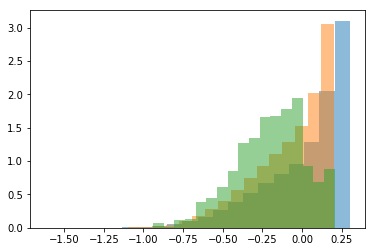

In [135]:
#all
p = plt.hist(0.218*gr+0.571-rz,bins=20,normed = True,alpha=0.5)
#part
p = plt.hist(0.218*grls+0.571-rzls,bins=20,normed = True,alpha=0.5)
p = plt.hist(0.218*grs+0.571-rzs,bins=20,normed = True,alpha=0.5)
#real elgs 
#p = plt.hist(0.218*grle+0.571-rzle,bins=20,alpha=0.8,normed = True)
#p = plt.hist(0.218*dat_e_new['gr']+0.571-dat_e_new['rz'],bins=20,alpha=0.5,normed = True)

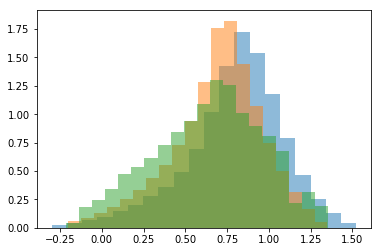

In [133]:
#my contamination version
p = plt.hist(-0.555*gr+1.901-rz,bins=20,normed = True,alpha=0.5)
#my contamination cutted to kaylans? version
p = plt.hist(-0.555*grls+1.901-rzls,bins=20,normed = True,alpha=0.5)
#kaylan's version
p = plt.hist(-0.555*grs+1.901-rzs,bins=20,normed = True,alpha=0.5)
#true elgs *same*
#p = plt.hist(-0.555*grle+1.901-rzle,bins=20,alpha=0.5,normed = True)
#p = plt.hist(-0.555*dat_e_new['gr']+1.901-dat_e_new['rz'],bins=20,alpha=0.5,normed = True)

In [4]:
def ELG_selection_for_dr3_02(path_2_tractor_file,region='sgc'):
    # opens the tractor file
    import numpy as n
    from astropy.table import Table
    hdu=fits.open(path_2_tractor_file)
    tractor=hdu[1].data
    hdu.close()

    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825-0.2)&(g<22.825+0.2)&(-0.068*rz+0.457<gr+0.2)&(gr-0.2< 0.112*rz+0.773) &(0.218*gr+0.571<rz+0.2)&(rz-0.2<-0.555*gr+1.901)
    color_ngc = (g>21.825-0.2)&(g<22.9+0.2)  &(-0.068*rz+0.457<gr+0.2)&(gr-0.2< 0.112*rz+0.773) &(0.637*gr+0.399<rz+0.2)&(rz-0.2<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])
    

In [5]:
flag,DDDAT = ELG_selection_for_dr3_02(fn_elg_like)

In [80]:
len(DDDAT)

809701

In [75]:
147676/809701

0.1823833736156927

In [115]:
def ELG_selection_for_dr3(path_2_tractor_file,region='sgc'):
    # opens the tractor file
    import numpy as n
    from astropy.table import Table
    hdu=fits.open(path_2_tractor_file)
    tractor=hdu[1].data
    hdu.close()

    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])

In [116]:
flag,datle = ELG_selection_for_dr3(fn_elg_like)

In [146]:
#selecting non-ELGs on sims
def select_non_ELG( path_2_tractor_file , region = 'sgc'):
    import numpy as n
    """
    Given the path to a tractor catalog, it returns two sub catalogs with the eBOSS ELG selections applied (NGC and SGC).
    """
    # opens the tractor file
    hdu=fits.open(path_2_tractor_file)
    dat=hdu[1].data
    hdu.close()
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(dat['gflux'] / dat['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * n.log10(dat['rflux'] / dat['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * n.log10(dat['zflux'] / dat['mw_transmission_z'])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(color_sgc)
    selection_ngc =(color_ngc)
    # returns the catalogs of ELGs
    if region == 'sgc':
            return dat[selection_sgc==False]
    if region == 'ngc':
            return dat[selection_ngc==False]

In [149]:
sim_non_ELG = select_non_ELG(fn_sim)

In [151]:
def non_ELG_selection_for_dr3(dat,region='sgc'):
    # opens the tractor file
    import numpy as n
    from astropy.table import Table
    tractor=dat
    
    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
            return Table(tractor[selection_sgc.astype(bool)==False])
    if region == 'ngc':
            return Table(tractor[selection_ngc.astype(bool)==False])

In [162]:
dr3_non_ELG = non_ELG_selection_for_dr3(DDDAT)

In [163]:
#sim_non_ELG
#dr3_non_ELG

brickid,brickname,objid,brick_primary,blob,ninblob,tycho2inblob,type,ra,ra_ivar,dec,dec_ivar,bx,by,bx0,by0,left_blob,out_of_bounds,dchisq [5],ebv,cpu_source,cpu_blob,blob_width,blob_height,blob_npix,blob_nimages,blob_totalpix,decam_flux [6],decam_flux_ivar [6],"decam_apflux [6,8]","decam_apflux_resid [6,8]","decam_apflux_ivar [6,8]",decam_mw_transmission [6],decam_nobs [6],decam_rchi2 [6],decam_fracflux [6],decam_fracmasked [6],decam_fracin [6],decam_anymask [6],decam_allmask [6],decam_psfsize [6],wise_flux [4],wise_flux_ivar [4],wise_mw_transmission [4],wise_nobs [4],wise_fracflux [4],wise_rchi2 [4],"wise_lc_flux [2,5]","wise_lc_flux_ivar [2,5]","wise_lc_nobs [2,5]","wise_lc_fracflux [2,5]","wise_lc_rchi2 [2,5]","wise_lc_mjd [2,5]",fracDev,fracDev_ivar,shapeExp_r,shapeExp_r_ivar,shapeExp_e1,shapeExp_e1_ivar,shapeExp_e2,shapeExp_e2_ivar,shapeDev_r,shapeDev_r_ivar,shapeDev_e1,shapeDev_e1_ivar,shapeDev_e2,shapeDev_e2_ivar,decam_depth [6],decam_galdepth [6]
int32,str8,int32,bool,int32,int16,bool,str4,float64,float32,float64,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,int16,int16,int32,int16,int32,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
327488,0001m005,216,True,151,3,False,EXP,0.055519278748,1.21933e+10,-0.623046835911,1.62994e+10,2754.14,108.771,2755.0,109.0,False,False,1307.35 .. 2082.49,0.0401786,7.77,21.17,55,36,1294,12,15197,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.86257 .. 0.961391,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,21.128 .. -663.741,0.919047 .. 1.74852e-05,0.993214 .. 0.999663,50 .. 13,0.166265 .. 1.08682,0.643254 .. 0.0920051,23.1771 .. 0.0,0.236962 .. 0.0,12 .. 0,0.145405 .. 0.0,0.449445 .. 0.0,55368.5 .. 0.0,0.0,0.0,1.37311,985.144,-0.111222,1568.48,-0.141567,1977.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
327488,0001m005,232,True,163,1,False,EXP,0.186912719392,4.52833e+10,-0.622575493095,4.60963e+10,948.839,115.249,949.0,115.0,False,False,1980.71 .. 2008.59,0.0428808,5.62,5.85,27,28,522,12,6149,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.854037 .. 0.958848,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,4.41813 .. -49.892,1.04497 .. 1.8899e-05,0.992759 .. 0.999641,47 .. 13,0.412701 .. 10.6221,0.991077 .. 0.134436,5.51642 .. 0.0,0.282473 .. 0.0,12 .. 0,0.321434 .. 0.0,0.788296 .. 0.0,55368.5 .. 0.0,0.0,0.0,0.269421,2710.32,-0.0236776,199.013,-0.0171693,144.813,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
327488,0001m005,256,True,181,1,False,EXP,0.132862453121,4.56467e+10,-0.621266802,3.78663e+10,1691.47,133.236,1692.0,133.0,False,False,3129.24 .. 4113.67,0.0422641,9.27,9.53,32,34,720,12,8561,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.855977 .. 0.959428,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,5.61692 .. -457.451,1.10003 .. 2.27137e-05,0.992863 .. 0.999646,53 .. 16,0.0618257 .. 0.931615,0.601922 .. 0.155584,5.0021 .. 0.0,0.283682 .. 0.0,13 .. 0,0.0936808 .. 0.0,0.427369 .. 0.0,55368.5 .. 0.0,0.0,0.0,0.793733,3348.79,0.0818973,2374.03,-0.0579267,1679.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
327488,0001m005,271,True,192,2,False,EXP,0.188735982627,2.83841e+10,-0.621025850706,2.01595e+10,923.788,136.542,924.0,137.0,False,False,1438.59 .. 1782.83,0.0427901,8.09,12.95,34,44,822,12,9775,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.854322 .. 0.958934,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,12.6538 .. 788.071,1.0193 .. 1.87354e-05,0.992775 .. 0.999641,47 .. 13,0.197443 .. 0.842002,1.03152 .. 0.141549,12.0794 .. 0.0,0.271895 .. 0.0,12 .. 0,0.208056 .. 0.0,0.681024 .. 0.0,55368.5 .. 0.0,0.0,0.0,0.681769,1452

In [155]:
g1 = 22.5 - 2.5 * np.log10(dr3_non_ELG['decam_flux'].transpose()[1]/dr3_non_ELG['decam_mw_transmission'].transpose()[1])
r1 = 22.5 - 2.5 * np.log10(dr3_non_ELG['decam_flux'].transpose()[2]/dr3_non_ELG['decam_mw_transmission'].transpose()[2])
z1 = 22.5 - 2.5 * np.log10(dr3_non_ELG['decam_flux'].transpose()[4]/dr3_non_ELG['decam_mw_transmission'].transpose()[4])
gr1 = gle-rle
rz1 = rle-zle

In [157]:
g2 = 22.5 - 2.5 * np.log10(sim_non_ELG['gflux']/sim_non_ELG['mw_transmission_g'])
r2 = 22.5 - 2.5 * np.log10(sim_non_ELG['rflux']/sim_non_ELG['mw_transmission_r'])
z2 = 22.5 - 2.5 * np.log10(sim_non_ELG['zflux']/sim_non_ELG['mw_transmission_z'])
gr2 = g2-r2
rz2 = r2-z2

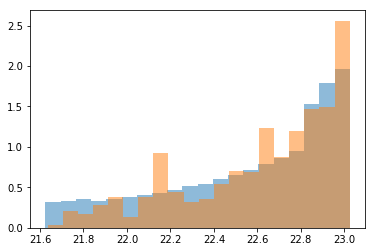

In [159]:
p1 = plt.hist(g1,bins=20,normed = True,alpha=0.5)
p1 = plt.hist(g2,bins=20,normed = True,alpha=0.5)

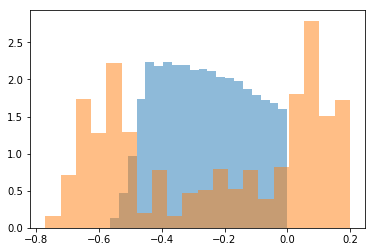

In [161]:
p1 = plt.hist(-0.068*rz1+0.457-gr1,bins=20,normed = True,alpha=0.5)
p1 = plt.hist(-0.068*rz2+0.457-gr2,bins=20,normed = True,alpha=0.5)